## Setup

In [1]:
import numpy as np
import gzip

from astropy.utils.data import download_file
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS

import matplotlib.pyplot as plt

from bliss.utils.download_utils import download_file_to_dst

def plot_image(hdu):
    ax = plt.subplot(projection=WCS(hdu.header))
    ax.imshow(hdu.data,cmap='gray',vmin=hdu.data.min(),vmax=hdu.data.min()+(hdu.data.max()-hdu.data.min())/100.)

URLBASE = "https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr9"
ra, dec = 336.635, -0.96

survey_bricks_filename = download_file(f"{URLBASE}/south/survey-bricks-dr9-south.fits.gz", cache=True, show_progress=True, timeout=120)

# ra1 - lower RA boundary
# ra2 - upper RA boundary
# dec1 - lower Dec boundary
# dec2 - upper Dec boundary
survey_bricks = Table.read(survey_bricks_filename)

# Basic (RA, Dec) <--> Brick conversion
brickname = survey_bricks[
            (survey_bricks["ra1"] <= ra)
            & (survey_bricks["ra2"] >= ra)
            & (survey_bricks["dec1"] <= dec)
            & (survey_bricks["dec2"] >= dec)
        ]["brickname"][0]
print(f"Brick for RA, Dec ({ra}, {dec}):", brickname)

Brick for RA, Dec (336.635, -0.96): 3366m010


## DECaLS Co-added Images

Get images

In [60]:
image_g_filename = download_file("{}/south/coadd/{}/{}/legacysurvey-{}-image-g.fits.fz".format(URLBASE, brickname[:3], brickname, brickname), cache=False)
image_r_filename = download_file("{}/south/coadd/{}/{}/legacysurvey-{}-image-r.fits.fz".format(URLBASE, brickname[:3], brickname, brickname), cache=False)
image_z_filename = download_file("{}/south/coadd/{}/{}/legacysurvey-{}-image-z.fits.fz".format(URLBASE, brickname[:3], brickname, brickname), cache=False)

In [61]:
image_g = fits.open(image_g_filename)
image_r = fits.open(image_r_filename)
image_z = fits.open(image_z_filename)

In [65]:
image_g[1].header["BRICK"]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 3600 / length of original image axis                  
NAXIS2  =                 3600 / length of original image axis                  
ZDITHER0=                 9646 / dithering offset when quantizing floats        
COMMENT Data product of the DESI Imaging Legacy Surveys                         
COMMENT Full documentation at http://legacysurvey.org                           
LEGPIPEV= 'DR10.0.1'           / legacypipe git version                         
LSDIR   = '/global/cfs/cdirs/cosmo/work/legacysurvey/dr10' / $LEGACY_SURVEY_DIR 
LSDR    = 'DR10    '           / Data release number                            
RUNDATE = '2022-07-14T22:08:03.805910' / runbrick.py run time                   
SURVEY  = 'DECaLS+BASS+MzLS'

Inspect SDSS images and catalog

In [8]:
fitsfile = fits.open("/home/zhteoh/871-decals-e2e/data/sdss/94/1/12/frame-g-000094-1-0012.fits")

In [9]:
hdu0 = fitsfile[0]
hdu1 = fitsfile[1]
hdu2 = fitsfile[2]
hdu3 = fitsfile[3]

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '19/09/98' to '1998-09-19''. [astropy.wcs.wcs]


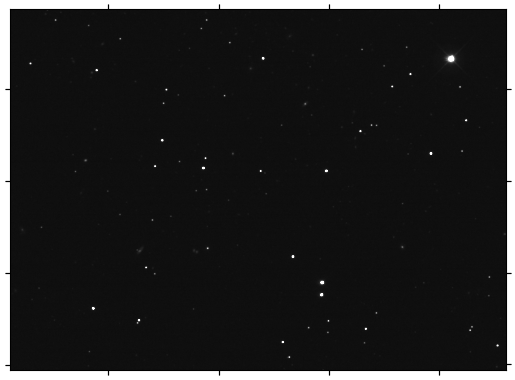

In [13]:
plot_image(hdu0)

In [14]:
hdu0.data # sky-subtracted nmgy/pixel

array([[ 0.00392914, -0.02172852, -0.01852417, ..., -0.02224731,
        -0.01904297, -0.01264954],
       [ 0.00392914, -0.01210022,  0.00392914, ...,  0.01290894,
         0.0001328 ,  0.00332642],
       [ 0.01675415, -0.00248337, -0.0345459 , ...,  0.01611328,
         0.00013304,  0.0256958 ],
       ...,
       [ 0.04626465,  0.00455475,  0.00134468, ..., -0.01202393,
        -0.01521301,  0.00075817],
       [-0.01791382,  0.01097107,  0.03662109, ...,  0.06787109,
        -0.01202393,  0.01034546],
       [ 0.00775909,  0.00134468, -0.05963135, ...,  0.01672363,
        -0.02160645, -0.0184021 ]], dtype=float32)

## DECaLS PSF

Get DECaLS PSF model

In [15]:
brick_model_g_filename = download_file(f"{URLBASE}/south/coadd/{brickname[:3]}/{brickname}/legacysurvey-{brickname}-model-g.fits.fz", cache=True, show_progress=True, timeout=120)
brick_model_r_filename = download_file(f"{URLBASE}/south/coadd/{brickname[:3]}/{brickname}/legacysurvey-{brickname}-model-r.fits.fz", cache=True, show_progress=True, timeout=120)
brick_model_z_filename = download_file(f"{URLBASE}/south/coadd/{brickname[:3]}/{brickname}/legacysurvey-{brickname}-model-z.fits.fz", cache=True, show_progress=True, timeout=120)

In [17]:
psfsize_g_filename = download_file(f"{URLBASE}/south/coadd/{brickname[:3]}/{brickname}/legacysurvey-{brickname}-psfsize-g.fits.fz", cache=True, show_progress=True, timeout=120)
psfsize_r_filename = download_file(f"{URLBASE}/south/coadd/{brickname[:3]}/{brickname}/legacysurvey-{brickname}-psfsize-r.fits.fz", cache=True, show_progress=True, timeout=120)
psfsize_z_filename = download_file(f"{URLBASE}/south/coadd/{brickname[:3]}/{brickname}/legacysurvey-{brickname}-psfsize-z.fits.fz", cache=True, show_progress=True, timeout=120)

In [18]:
tractor_g_fitsfile = fits.open(brick_model_r_filename)
tractor_r_fitsfile = fits.open(brick_model_r_filename)
tractor_z_fitsfile = fits.open(brick_model_r_filename)

PSF via params in `ccds-annotated-decam-dr9.fits.gz`

In [ ]:
# WARNING: DOWNLOAD TAKES A LONG TIME - 1.71GB
from bliss.utils.download_utils import download_file_to_dst
import gzip

# REPLACE THIS WITH YOUR ${workspaceFolder}
WORKSPACE_FOLDER = "/home/zhteoh/871-decals-e2e"
dst_filename = f"{WORKSPACE_FOLDER}/data/ccds-annotated-decam-dr9.fits.gz"
ccds_annotated_filename = download_file_to_dst(f"{URLBASE}/ccds-annotated-decam-dr9.fits.gz", 
                                               dst_filename,
                                               gzip.decompress)

In [20]:
ccds_annotated = Table.read("/home/zhteoh/871-decals-e2e/data/decals/ccds-annotated-decam-dr9.fits")

In [ ]:
select_cols = ["ccdname", "ra", "dec"]
psf_cols = [col for col in ccds_annotated.colnames if col.startswith("psf") or col.startswith("gal") or col.startswith("gauss") or col in select_cols]
ccds_annotated[psf_cols][:5].show_in_notebook()

idx,ccdname,ra,dec,psfnorm_mean,psfnorm_std,galnorm_mean,galnorm_std,psf_mx2,psf_my2,psf_mxy,psf_a,psf_b,psf_theta,psf_ell,psfdepth,galdepth,gausspsfdepth,gaussgaldepth
0,S29,7.455790355943946,-42.10477608922134,0.114690475,0.0011206337,0.09208971,0.00059299235,11.024782,10.704435,0.3695506,3.3566916,3.2344766,33.283363,0.03640933,21.577566,21.339273,21.765394,21.508904
1,S31,8.29287502945703,-42.10550577934238,0.11552497,0.00075078977,0.09249403,0.00035679387,11.047343,11.1978035,-0.6110118,3.4261055,3.2414422,-48.50959,0.053898897,21.610611,21.369205,21.784023,21.529858
2,S25,7.244463335916217,-42.267722960109246,0.11595932,0.00062083517,0.09273505,0.0003941055,11.372338,11.054045,0.56274897,3.4348233,3.2601185,37.10449,0.050862856,21.63025,21.387596,21.840954,21.57183
3,S26,7.664103748882487,-42.26920159533759,0.11787354,0.0015322721,0.093729496,0.0008609283,10.645797,10.500119,0.13307856,3.2748537,3.2281961,30.653217,0.014247229,21.657894,21.409044,21.87089,21.594278
4,S27,8.084030891252237,-42.269636865181134,0.1181222,0.0006664335,0.09377218,0.00041386558,10.9926,10.60533,-0.10567157,3.319572,3.252441,-14.311199,0.020222757,21.640247,21.389606,21.84729,21.57206


Get CCDs used for brick

In [ ]:
brick_ccds_filename = download_file("{}/south/coadd/{}/{}/legacysurvey-{}-ccds.fits".format(URLBASE, brickname[:3], brickname, brickname), cache=False)
brick_ccds = Table.read(brick_ccds_filename)

In [ ]:
ccds_for_brick = brick_ccds["ccdname"]

In [11]:
# Show rows in ccds_annotated that match the ccds_for_brick
mask = np.isin(ccds_annotated["ccdname"], ccds_for_brick)
ccds_psf_r = ccds_annotated[mask & (ccds_annotated["filter"] == 'r')][psf_cols]

Create PSF model based on these CCDs

In [15]:
psf_mx2 = np.median(ccds_psf_r["psf_mx2"])
psf_my2 = np.median(ccds_psf_r["psf_my2"])
psf_mxy = np.median(ccds_psf_r["psf_mxy"])
psf_a = np.median(ccds_psf_r["psf_a"])
psf_b = np.median(ccds_psf_r["psf_b"])
psf_theta = np.median(ccds_psf_r["psf_theta"])
psf_ell = np.median(ccds_psf_r["psf_ell"])

psfnorm_mean = np.median(ccds_psf_r["psfnorm_mean"])
psfnorm_std = np.median(ccds_psf_r["psfnorm_std"])

psfdepth = np.median(ccds_psf_r["psfdepth"])
galdepth = np.median(ccds_psf_r["galdepth"])
gausspsfdepth = np.median(ccds_psf_r["gausspsfdepth"])
gaussgaldepth = np.median(ccds_psf_r["gaussgaldepth"])

Or use FWHM for brick

In [17]:
brick_fwhm_g_filename = download_file("{}/south/coadd/{}/{}/legacysurvey-{}-psfsize-g.fits.fz".format(URLBASE, brickname[:3], brickname, brickname), cache=False)
brick_fwhm_r_filename = download_file("{}/south/coadd/{}/{}/legacysurvey-{}-psfsize-r.fits.fz".format(URLBASE, brickname[:3], brickname, brickname), cache=False)
brick_fwhm_z_filename = download_file("{}/south/coadd/{}/{}/legacysurvey-{}-psfsize-z.fits.fz".format(URLBASE, brickname[:3], brickname, brickname), cache=False)

In [35]:
brick_fwhm_g = fits.open(brick_fwhm_g_filename)
brick_fwhm_r = fits.open(brick_fwhm_r_filename)
brick_fwhm_z = fits.open(brick_fwhm_z_filename)

psf_fwhm = np.median(brick_fwhm_r[1].data)

In [33]:
psf_fwhm.shape

(3600, 3600)

In [37]:
pixel_scale = 0.262
psf_slen = 63

In [39]:
import numpy as np
import torch

def _get_mgrid():
    """Construct the base grid for the PSF."""
    offset = (psf_slen - 1) / 2
    x, y = np.mgrid[-offset : (offset + 1), -offset : (offset + 1)]
    mgrid = torch.tensor(np.dstack((y, x))) / offset
    return mgrid.float()

In [36]:
import galsim
import math

# Create the PSF model

# Inner Moffat profile
psf_inner = galsim.Moffat(beta=psf_b, fwhm=psf_fwhm)

# Outer profile - Moffat or Power-law
band = 'r'
if band == 'z':
    alpha, beta, weight = 17.650, 1.7, 0.0145
    compact_z_ccds = ['N20', 'S8', 'S10', 'S18', 'S21', 'S27']
    if ccds_for_brick in compact_z_ccds:
        alpha, beta, weight = 16, 2.3, 0.0095
    # Create the first Moffat PSF component
    moffat1 = galsim.Moffat(beta=beta, fwhm=2 * alpha * math.sqrt(2**(1/beta) - 1))
    # Create the second Moffat PSF component
    moffat2 = galsim.Moffat(beta=beta, fwhm=2 * alpha * math.sqrt(2**(1/beta) - 1) / weight)
    # Combine the two Moffat components using Moffat weighting
    weighted_moffat = weight * moffat1 + (1 - weight) * moffat2
    psf_outer = weighted_moffat
else:
    assert band in ['g', 'r', 'i']
    grid = _get_mgrid() * (psf_slen - 1) / 2
    radii_grid = (grid**2).sum(2).sqrt()
    if band == 'g':
        outer = 0.00045 * radii_grid**(-2)
    elif band == 'r':
        outer = 0.00033 * radii_grid**(-2)
    elif band == 'i':
        outer = 0.00033 * radii_grid**(-2)
    psf_outer = galsim.InterpolatedImage(galsim.Image(outer.numpy(), scale=pixel_scale)).withFlux(1.0)

# Combine the inner and outer profiles
psf_combined = galsim.Convolve([psf_inner, psf_outer])

# Apply ellipticity and position angle to the PSF model
psf_combined = psf_combined.shear(e=psf_ell, beta=psf_theta * galsim.degrees)

psf_image = galsim.Image(psf_combined.detach().numpy(), scale=pixel_scale)
psf_image /= psfnorm_mean

psf = galsim.InterpolatedImage(psf_image).withFlux(1.0)


## SDSS PSF

Inspect SDSS PSF

In [43]:
bands = [0, 1, 2, 3, 4]
pixel_scale=0.396
psf_slen=25

In [44]:
import torch

def _psf_fun(r, sigma1, sigma2, sigmap, beta, b, p0):
    term1 = torch.exp(-(r**2) / (2 * sigma1))
    term2 = b * torch.exp(-(r**2) / (2 * sigma2))
    term3 = p0 * (1 + r**2 / (beta * sigmap)) ** (-beta / 2)
    return (term1 + term2 + term3) / (1 + b + p0)

In [45]:
import numpy as np

def _get_mgrid():
    """Construct the base grid for the PSF."""
    offset = (psf_slen - 1) / 2
    x, y = np.mgrid[-offset : (offset + 1), -offset : (offset + 1)]
    mgrid = torch.tensor(np.dstack((y, x))) / offset
    return mgrid.float()

In [46]:
from einops import rearrange, reduce
import torch

def get_psf(params):
    """Construct PSF image from parameters. This is the main entry point for generating the psf.

    Args:
        params: list of psf parameters, loaded from _get_fit_file_psf_params

    Returns:
        images (List[InterpolatedImage]): list of psf transformations for each band
    """
    # get psf in each band
    psf_list = []
    for i in range(n_bands):
        grid = _get_mgrid() * (psf_slen - 1) / 2
        radii_grid = (grid**2).sum(2).sqrt()
        band_psf = _psf_fun(radii_grid, *params[i])
        psf_list.append(band_psf.unsqueeze(0))
    psf = torch.cat(psf_list)
    assert (psf > 0).all()

    # ensure it's normalized
    norm = reduce(psf, "b m k -> b", "sum")
    psf *= rearrange(1 / norm, "b -> b 1 1")

    # check format
    n_bands, psf_slen, _ = psf.shape
    assert n_bands == n_bands and (psf_slen % 2) == 1 and psf_slen == psf.shape[2]

    # convert to image
    images = []
    for i in range(n_bands):
        psf_image = galsim.Image(psf.detach().numpy()[i], scale=pixel_scale)
        images.append(galsim.InterpolatedImage(psf_image).withFlux(1.0))

    return images

In [58]:
from typing import Tuple
from pathlib import Path

def _get_fit_file_psf_params(psf_fit_file: str, bands: Tuple[int, ...]):
    """Load psf parameters from fits file.

    See https://data.sdss.org/datamodel/files/PHOTO_REDUX/RERUN/RUN/objcs/CAMCOL/psField.html
    for details on the parameters.

    Args:
        psf_fit_file (str): file to load from
        bands (Tuple[int, ...]): SDSS bands to load

    Returns:
        psf_params: tensor of parameters for each band
    """
    msg = (
        f"{psf_fit_file} does not exist. "
        + "Make sure data files are available for fields specified in config."
    )
    assert Path(psf_fit_file).exists(), msg
    # HDU 6 contains the PSF header (after primary and eigenimages)
    data = fits.open(psf_fit_file, ignore_missing_end=True).pop(6).data
    psf_params = torch.zeros(len(bands), 6)
    for i, band in enumerate(bands):
        sigma1 = data["psf_sigma1"][0][band] ** 2
        sigma2 = data["psf_sigma2"][0][band] ** 2
        sigmap = data["psf_sigmap"][0][band] ** 2
        beta = data["psf_beta"][0][band]
        b = data["psf_b"][0][band]
        p0 = data["psf_p0"][0][band]

        psf_params[i] = torch.tensor([sigma1, sigma2, sigmap, beta, b, p0])

    return psf_params

psf_fit_file = "/home/zhteoh/871-decals-e2e/data/sdss/94/1/12/psField-000094-1-0012.fits"

In [68]:
data = fits.open(psf_fit_file, ignore_missing_end=True).pop(6).data
psf_params = torch.zeros(len(bands), 6)

data["psf_sigma2"][0]

array([3.5367863, 3.1703002, 2.994038 , 3.3874602, 1.8700007],
      dtype=float32)

## DECaLS Prior via single-exposure DECam CCDs

In [2]:
BRICKNAME = brickname
BRICKNAME

'3366m010'

In [3]:
brick_ccds_filename = download_file(f"{URLBASE}/south/coadd/{BRICKNAME[:3]}/{BRICKNAME}/legacysurvey-{BRICKNAME}-ccds.fits", cache=False, show_progress=True, timeout=120)
brick_ccds = Table.read(brick_ccds_filename)
brick_ccds.show_in_notebook(display_length=2)

idx,image_filename,image_hdu,camera,expnum,plver,procdate,plprocid,ccdname,object,propid,filter,exptime,mjd_obs,airmass,fwhm,width,height,ra_bore,dec_bore,crpix1,crpix2,crval1,crval2,cd1_1,cd1_2,cd2_1,cd2_2,yshift,ra,dec,skyrms,sig1,ccdzpt,zpt,ccdraoff,ccddecoff,ccdskycounts,ccdskysb,ccdrarms,ccddecrms,ccdphrms,phrms,ccdnastrom,ccdnphotom,ccd_cuts,ccd_x0,ccd_y0,ccd_x1,ccd_y1,brick_x0,brick_x1,brick_y0,brick_y1,psfnorm,galnorm,skyver,psfver,skyplver,psfplver,co_sky
0,decam/CP/V4.8.2a/CP20130909/c4d_130910_014701_ooi_g_ls9.fits.fz,11,decam,232263,V4.8.2a,2019-08-08T12:58:34,9546715,S23,DES survey hex -235-14 tiling 1,2012B-0001,g,90.0,56545.07431716,1.33,4.959119,2046,4094,336.4609,-1.4145,8913.4,-2212.333,336.4661922529,-1.410278517151,-1.371452e-07,7.2858216e-05,-7.2857954e-05,-1.2415835e-07,False,336.77811624687314,-0.8347166520766813,0.08112403,0.0063870163,25.148787,25.139305,-0.022975158,0.013826741,1.9689765,22.965904,0.03837581,0.035306595,0.024606125,0.0,190,215,0,1493,14,2032,1746,1,1741,3061,3605,0.11605664,0.09363042,DR9.5.9,DR9.0.1-11-gb167e27c,V4.8.2a,V4.8.2a,-8.4510255e-05
1,decam/CP/V4.8.2a/CP20171108/c4d_171109_002003_ooi_g_ls9.fits.fz,7,decam,694142,V4.8.2a,2019-07-24T10:02:42,952682e,S28,DES survey hex -235-14 tiling 8,2012B-0001,g,90.0,58066.01393135,1.15,4.220534,2046,4094,336.22122083333335,-1.5497638888888887,11167.8,-4342.0,336.2256174351,-1.5484579785,-1.3821646e-07,7.284893e-05,-7.2850744e-05,-1.3884555e-07,False,336.6928253823203,-0.8094099451396979,0.101871386,0.009180382,25.032684,25.022644,0.04463879,-0.050566312,3.175314,22.44704,0.04790215,0.06241368,0.024957126,0.0,194,229,0,1837,14,2032,2913,1,2909,3406,3610,0.13101818,0.100226074,DR9.5.9,DR9.0.1-27-g1f3e9a77,V4.8.2a,V4.8.2a,-8.4510255e-05
2,decam/CP/V4.8.2a/CP20170926/c4d_170927_025655_ooi_z_ls9.fits.fz,7,decam,681992,V4.8.2a,2019-07-20T19:45:47,951ee00,S28,DES survey hex -235-14 tiling 8,2012B-0001,z,90.0,58023.12286809,1.14,2.936718,2046,4094,336.229875,-1.5416666666666665,11167.8,-4342.0,336.2298657446,-1.541653145183,-1.3660662e-07,7.284871e-05,-7.285018e-05,-1.3839802e-07,False,336.69718641002964,-0.8026085048707511,0.24154165,0.02371141,24.985935,24.987888,0.030673454,-0.032290384,19.731651,20.337599,0.033255167,0.03756013,0.02394872,0.0,191,222,0,1930,14,2032,2853,1,2849,3500,3611,0.17461237,0.11585495,DR9.5.9,DR9.0.1-27-g1f3e9a77,V4.8.2a,V4.8.2a,2.778646e-05
3,decam/CP/V4.8.2a/CP20170926/c4d_170927_025457_ooi_r_ls9.fits.fz,7,decam,681991,V4.8.2a,2019-07-23T20:32:01,95254c6,S28,DES survey hex -235-14 tiling 8,2012B-0001,r,90.0,58023.12149533,1.14,3.544065,2046,4094,336.22122083333335,-1.5497638888888887,11167.8,-4342.0,336.2301008356,-1.541801022795,-1.3388022e-07,7.285396e-05,-7.285599e-05,-1.3169732e-07,False,336.6972963452925,-0.802683308344434,0.1210436,0.009276179,25.23642,25.242157,0.03515506,-0.04522394,4.7206464,22.224503,0.03642664,0.05002352,0.01733912,0.0,189,222,0,1929,14,2032,2852,1,2847,3499,3610,0.15297432,0.10936827,DR9.5.9,DR9.0.1-27-g1f3e9a77,V4.8.2a,V4.8.2a,-6.440953e-05
4,decam/CP/V4.8.2a/CP20141020/c4d_141021_015854_ooi_g_ls9.fits.fz,12,decam,369756,V4.8.2a,2019-08-11T17:57:10,954d2a0,S14,DES survey hex -219-4 tiling 3,2012B-0001,g,90.0,56951.08096597,1.16,4.490478,2046,4094,337.51620833333334,-1.2284919444444444,6659.0,12695.33,337.5162183566,-1.227162463415,-1.3032033e-07,7.285313e-05,-7.285385e-05,-1.2954756e-07,False,336.7404891711277,-0.814895181278943,0.07095721,0.005949085,25.121017,25.123192,-0.004172018,0.012332194,1.5163069,23.249538,0.024430003,0.030062405,0.021746622,0.0,191,217,0,1763,14,2032,2264,0,2253,3332,3603,0.11368429,0.0900916,DR9.5.9,DR9.0.1-27-g1f3e9a77,V4.8.2a,V4.8.2a,-8.4510255e-05
5,decam/CP/V4.8.2a/CP20141013/c4d_141014_014535_ooi_g_ls9.fits.fz,12,decam,367454,V4.8.2a,2019-08-11T17:57:05,954d2a0,S14,DES survey hex -219-4 tiling 3,2012B-0001,g,90.0,56944.07169789,1.14,6.175831,2046,4094,337.51620833333334,-1.2284919444444444,6659.0,12695.33,337.5175594136,-1.226619259661,-1.3362141e-07,7.285

In [4]:
# Choose a CCD (i.e., given image)
CCDNAME = "S28"

# NOTE: make sure images exist for these filters
BANDS = ["g", "r", "z"]

In [5]:
brick_ccds_fits = fits.open(brick_ccds_filename)

# Get image data from `CCDNAME`, for each band
image_basenames_without_ext = {}
matching_rows = []
for band in BANDS:
    matching_row = np.where((brick_ccds["ccdname"] == CCDNAME) & (brick_ccds["filter"] == band))[0][0]
    image_basenames_without_ext[band] = brick_ccds["image_filename"][matching_row].replace(".fits.fz", "")
    matching_rows.append(matching_row)

print(image_basenames_without_ext)
brick_ccds[matching_rows].show_in_notebook()

{'g': 'decam/CP/V4.8.2a/CP20171108/c4d_171109_002003_ooi_g_ls9', 'r': 'decam/CP/V4.8.2a/CP20170926/c4d_170927_025457_ooi_r_ls9', 'z': 'decam/CP/V4.8.2a/CP20170926/c4d_170927_025655_ooi_z_ls9'}


idx,image_filename,image_hdu,camera,expnum,plver,procdate,plprocid,ccdname,object,propid,filter,exptime,mjd_obs,airmass,fwhm,width,height,ra_bore,dec_bore,crpix1,crpix2,crval1,crval2,cd1_1,cd1_2,cd2_1,cd2_2,yshift,ra,dec,skyrms,sig1,ccdzpt,zpt,ccdraoff,ccddecoff,ccdskycounts,ccdskysb,ccdrarms,ccddecrms,ccdphrms,phrms,ccdnastrom,ccdnphotom,ccd_cuts,ccd_x0,ccd_y0,ccd_x1,ccd_y1,brick_x0,brick_x1,brick_y0,brick_y1,psfnorm,galnorm,skyver,psfver,skyplver,psfplver,co_sky
0,decam/CP/V4.8.2a/CP20171108/c4d_171109_002003_ooi_g_ls9.fits.fz,7,decam,694142,V4.8.2a,2019-07-24T10:02:42,952682e,S28,DES survey hex -235-14 tiling 8,2012B-0001,g,90.0,58066.01393135,1.15,4.220534,2046,4094,336.22122083333335,-1.5497638888888887,11167.8,-4342.0,336.2256174351,-1.5484579785,-1.3821646e-07,7.284893e-05,-7.2850744e-05,-1.3884555e-07,False,336.6928253823203,-0.8094099451396979,0.101871386,0.009180382,25.032684,25.022644,0.04463879,-0.050566312,3.175314,22.44704,0.04790215,0.06241368,0.024957126,0.0,194,229,0,1837,14,2032,2913,1,2909,3406,3610,0.13101818,0.100226074,DR9.5.9,DR9.0.1-27-g1f3e9a77,V4.8.2a,V4.8.2a,-8.4510255e-05
1,decam/CP/V4.8.2a/CP20170926/c4d_170927_025457_ooi_r_ls9.fits.fz,7,decam,681991,V4.8.2a,2019-07-23T20:32:01,95254c6,S28,DES survey hex -235-14 tiling 8,2012B-0001,r,90.0,58023.12149533,1.14,3.544065,2046,4094,336.22122083333335,-1.5497638888888887,11167.8,-4342.0,336.2301008356,-1.541801022795,-1.3388022e-07,7.285396e-05,-7.285599e-05,-1.3169732e-07,False,336.6972963452925,-0.802683308344434,0.1210436,0.009276179,25.23642,25.242157,0.03515506,-0.04522394,4.7206464,22.224503,0.03642664,0.05002352,0.01733912,0.0,189,222,0,1929,14,2032,2852,1,2847,3499,3610,0.15297432,0.10936827,DR9.5.9,DR9.0.1-27-g1f3e9a77,V4.8.2a,V4.8.2a,-6.440953e-05
2,decam/CP/V4.8.2a/CP20170926/c4d_170927_025655_ooi_z_ls9.fits.fz,7,decam,681992,V4.8.2a,2019-07-20T19:45:47,951ee00,S28,DES survey hex -235-14 tiling 8,2012B-0001,z,90.0,58023.12286809,1.14,2.936718,2046,4094,336.229875,-1.5416666666666665,11167.8,-4342.0,336.2298657446,-1.541653145183,-1.3660662e-07,7.284871e-05,-7.285018e-05,-1.3839802e-07,False,336.69718641002964,-0.8026085048707511,0.24154165,0.02371141,24.985935,24.987888,0.030673454,-0.032290384,19.731651,20.337599,0.033255167,0.03756013,0.02394872,0.0,191,222,0,1930,14,2032,2853,1,2849,3500,3611,0.17461237,0.11585495,DR9.5.9,DR9.0.1-27-g1f3e9a77,V4.8.2a,V4.8.2a,2.778646e-05


Get single calibrated images (for each band) for this CCD

In [7]:
from numpy.core.defchararray import find

from pyvo.dal import sia

DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_all"
svc = sia.SIAService(DEF_ACCESS_URL)

imgTable = svc.search((ra,dec)).to_table()
img_access_urls = {} # indexed by band
for b, basename in image_basenames_without_ext.items():
    # remove everything except filename (i.e., after last '/'), and after _`b` character
    img_filename = basename.split("/")[-1].split(f"_{b}")[0] + f"_{b}"
    # print(f"Searching for {img_filename} in {b}-band")
    b_access_url = imgTable[find(imgTable["access_url"].astype(str), img_filename) != -1][0]["access_url"]
    img_access_urls[b] = b_access_url

img_access_urls

{'g': 'https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_171109_002003_ooi_g_v1.fits.fz&extn=11&POS=336.635,-0.96&SIZE=1.0,1.0',
 'r': 'https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_170927_025457_ooi_r_v1.fits.fz&extn=11&POS=336.635,-0.96&SIZE=1.0,1.0',
 'z': 'https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_170927_025655_ooi_z_v1.fits.fz&extn=11&POS=336.635,-0.96&SIZE=1.0,1.0'}

In [8]:
# Download single images
ccd_images = {} # indexed by band
ccd_image_filenames = {} # indexed by band

for band, img_access_url in img_access_urls.items():
    img_fits_filename = download_file(img_access_url, cache=True, show_progress=True, timeout=120)
    ccd_image_filenames[band] = img_fits_filename
    img_fits = fits.open(img_fits_filename)
    ccd_images[band] = img_fits[0].data


In [9]:
# Shape of each single image
ccd_images["g"].shape

(4094, 2046)

### DECaLS PSF via single-exposure PSFEx FITS

In [22]:
# Get PSFEx fits, for each band
psfex_hdus = {}
for band in BANDS:
    psfex_fits_fn = download_file(f"{URLBASE}/calib/psfex/{image_basenames_without_ext[band]}-psfex.fits", cache=False)
    psfex_fits = fits.open(psfex_fits_fn)

    psfex_table_hdu = psfex_fits[1]

    # Get `row` corresponding to DECam image (i.e., CCD)
    rows = np.where(psfex_table_hdu.data["ccdname"] == CCDNAME)[0]
    assert len(rows) == 1
    row = rows[0]
    # print("Row:", row)

    # Get single values for the following parameters
    params = ["polnaxis", "polzero1", "polzero2", "polscal1", "polscal2", "polname1", "polname2", "polngrp", "polgrp1", "polgrp2", "poldeg1", "psfnaxis", "psfaxis1", "psfaxis2", "psfaxis3", "psf_samp"]

    # Create new BinTableHDU with just the row corresponding to the DECam image
    with fits.open(psfex_fits_fn, mode="update") as hdul:
        bintable = hdul[1]

        # Add to HDU header
        for param in params:
            bintable.header[param.upper()] = psfex_table_hdu.data[row][param]
        
        bintable.data = bintable.data[row:row+1]
        bintable.header["NAXIS2"] = 1
        bintable.header["NAXIS1"] = len(bintable.columns)

        hdul.flush()

    psfex_fits = fits.open(psfex_fits_fn)
    psfex_table_hdu = psfex_fits[1]
    psfex_hdus[band] = psfex_table_hdu

psfex_hdus

{'g': <astropy.io.fits.hdu.table.BinTableHDU at 0x7fabc42e5090>,
 'r': <astropy.io.fits.hdu.table.BinTableHDU at 0x7fabc424b4f0>,
 'z': <astropy.io.fits.hdu.table.BinTableHDU at 0x7fabc42e7d00>}

Create the PSF model, passing in the PSFEx and image HDUs

In [11]:
import galsim.des

des_psfex_r = galsim.des.DES_PSFEx(psfex_hdus["r"], ccd_image_filenames["r"])

In [20]:
image_pos = galsim.PositionD(0, 0)
psf_r = des_psfex_r.getPSF(image_pos)

In [21]:
psf_r

galsim.Transformation(galsim.InterpolatedImage(galsim.Image(bounds=galsim.BoundsI(xmin=-31, xmax=31, ymin=-31, ymax=31), array=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), wcs=galsim.PixelScale(1.0)), galsim.Lanczos(3, True, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)), galsim.Quintic(gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)), pad_factor=4.000000, flux=1, offset=galsim.PositionD(x=0.0, y=0.0), use_true_center=False, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05), _force_stepk=0.16762612525459764, _force_maxk=3.1661363461959633), jac=[[-0.0003340651582738621, -0.26340467031300896], [0.2629387243726864, -0.0006242851641142062]], offset=gals

### DECaLS background for CCD

In [38]:
background_hdus = {}
for band in BANDS:
    background_fits_fn = download_file(f"{URLBASE}/calib/sky/{image_basenames_without_ext[band]}-splinesky.fits", cache=False)
    background_fits = fits.open(background_fits_fn)

    background_table_hdu = background_fits[1]
    background_table = Table.read(background_table_hdu)

    # Get `row` corresponding to DECam image (i.e., CCD)
    rows = np.where(background_table["ccdname"] == CCDNAME)[0]
    assert len(rows) == 1
    row = rows[0]
    # print("Row:", row)

    # Create new BinTableHDU with just the row corresponding to the DECam image
    with fits.open(background_fits_fn, mode="update") as hdul:
        bintable = hdul[1]
        bintable.data = bintable.data[row:row+1]
        bintable.header["NAXIS2"] = 1
        bintable.header["NAXIS1"] = len(bintable.columns)

        hdul.flush()

    background_fits = fits.open(background_fits_fn)
    background_table_hdu = background_fits[1]
    background_hdus[band] = background_table_hdu

background_hdus

{'g': <astropy.io.fits.hdu.table.BinTableHDU at 0x7fbec1ed4a90>,
 'r': <astropy.io.fits.hdu.table.BinTableHDU at 0x7fbeca1fb9a0>,
 'z': <astropy.io.fits.hdu.table.BinTableHDU at 0x7fbec99521a0>}

In [39]:
bg_r = Table.read(background_hdus["r"])

bg_r[0]

gridw,gridh,gridvals,xgrid,ygrid,skyclass,x0,y0,order,expnum,ccdname,legpipev,plver,plprocid,procdate,imgdsum,sig1,templ_ver,templ_run,templ_scale,halo_zpt,blob_masked,sub_sga_ver,sky_mode,sky_med,sky_cmed,sky_john,sky_fine,sky_fmasked,sky_p0,sky_p10,sky_p20,sky_p30,sky_p40,sky_p50,sky_p60,sky_p70,sky_p80,sky_p90,sky_p100
int64,int64,"float32[17,9]",int32[9],int32[17],str27,int32,int32,uint8,int64,str3,str7,str7,str7,str19,str10,float64,int64,int32,float64,float64,bool,str2,float64,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9,17,423.7457 .. 423.93573,-1 .. 2047,-1 .. 4095,tractor.splinesky.SplineSky,0,0,3,681991,S28,DR9.5.9,V4.8.2a,95254c6,2019-07-23T20:32:01,3886802555,10.37957211187113,1,730,4.70749,30.120591625160813,True,L3,424.2267087283254,424.5815,424.31186,423.858,0.13054028,0.3267432109837203,-60.805877685546875,-13.864776611328125,-9.103356933593751,-5.683502197265625,-2.746673583984375,-0.001556396484375,2.749542236328125,5.704742431640625,9.152917480468744,13.970318603515636,63.24945068359375


In [30]:
from scipy.interpolate import RectBivariateSpline
from scipy.ndimage import zoom

splinesky_params = bg_r[0]
gridw = splinesky_params["gridw"]
gridh = splinesky_params["gridh"]
gridvals = splinesky_params["gridvals"]
xgrid = splinesky_params["xgrid"]
ygrid = splinesky_params["ygrid"]
order = splinesky_params["order"]

print("Spline grid shape:", (gridw, gridh))
print("Spline interpolation order:", order)

# Example image data
image_w, image_h = 3600, 3600
image = np.random.rand(image_w, image_h)

# Meshgrid for pixel coordinates on smaller grid
x, y = np.meshgrid(np.arange(gridw), np.arange(gridh))
# Initialize the B-spline sky model with the extracted parameters
splinesky_x = RectBivariateSpline(ygrid, xgrid, gridvals, kx=order, ky=order)
splinesky_y = RectBivariateSpline(ygrid, xgrid, gridvals, kx=order, ky=order)

# Evaluate the sky model at the given pixel coordinates
background_values_grid = splinesky_x(y.flatten(), x.flatten(), grid=False).reshape(gridh, gridw)

# Upscale the background values from the smaller grid to the original image size using bilinear interpolation
background_values = zoom(background_values_grid, zoom=(image_h / gridh, image_w / gridw), order=order, mode='nearest')

print("===")
print("B-spline interpolated background shape:", background_values.shape)
background_values

Spline grid shape: (9, 17)
Spline interpolation order: 3
===
B-spline interpolated background shape: (3600, 3600)


array([[423.74661769, 423.74661876, 423.74661983, ..., 423.75416409,
        423.75416514, 423.75416618],
       [423.7466176 , 423.74661867, 423.74661974, ..., 423.75416399,
        423.75416504, 423.75416608],
       [423.74661751, 423.74661858, 423.74661965, ..., 423.75416389,
        423.75416494, 423.75416598],
       ...,
       [423.74521493, 423.74521599, 423.74521705, ..., 423.75269967,
        423.75270071, 423.75270175],
       [423.74521463, 423.74521568, 423.74521674, ..., 423.75269935,
        423.7527004 , 423.75270143],
       [423.74521432, 423.74521538, 423.74521644, ..., 423.75269904,
        423.75270008, 423.75270112]])

## Test

In [2]:
from bliss.generate import generate
from bliss.api import base_config

cfg = base_config()
cfg.generate.cached_data_path = "/data/scratch/zhteoh/871-decals-e2e/des_cached_dataset"
cfg.generate.n_batches = 3
cfg.generate.batch_size = 4
cfg.generate.max_images_per_file = 8
cfg.simulator.survey = "${surveys.des}"
generate(cfg)

ImportError: libcudnn.so.8: cannot open shared object file: No such file or directory